In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('datasets/heart_disease_risk.csv')
df.head()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0


In [3]:
# Clean the data and combine columns

symptoms = ['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea']
risk_factors = ['High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity', 'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender', 'Age']
risk = ['Heart_Risk']
df['Symptoms_Average'] = df[symptoms].mean(axis=1)
df['Risk_Factors_Average'] = df[risk_factors].mean(axis=1)
df['Heart_Disease_Factors'] = (df['Symptoms_Average'] + df['Risk_Factors_Average']) / 2

if df['Age'].max() > 1:  # Check if Age is not already normalized
    df['Age'] = df['Age'] / 100

In [4]:
df['group_id'] = np.arange(len(df)) // 20

grouped_df = df.groupby('group_id').agg({
    **{symptom: 'sum' for symptom in symptoms},
    **{factor: 'sum' for factor in risk_factors},
    risk[0]: 'mean'  # Using mean for heart risk to keep it between 0 and 1
})

grouped_df['Total_Symptoms'] = grouped_df[symptoms].sum(axis=1)
grouped_df['Total_Risk_Factors'] = grouped_df[risk_factors].sum(axis=1)
grouped_df['Normalized_Symptoms'] = grouped_df['Total_Symptoms'] / (20 * len(symptoms))
grouped_df['Normalized_Risk_Factors'] = grouped_df['Total_Risk_Factors'] / (20 * len(risk_factors))

grouped_df['Heart_Disease_Factors'] = (grouped_df['Normalized_Symptoms'] + grouped_df['Normalized_Risk_Factors']) / 2


In [5]:
X = grouped_df[['Heart_Disease_Factors']]  # Independent variable
y = grouped_df[risk[0]]  # Dependent variable (Heart_Risk)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [7]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Model Coefficient: {model.coef_[0]:.4f}")
print(f"Model Intercept: {model.intercept_:.4f}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")

Model Coefficient: 1.7577
Model Intercept: -0.3876
Training MSE: 0.0019
Testing MSE: 0.0018
Training R²: 0.8462
Testing R²: 0.8632


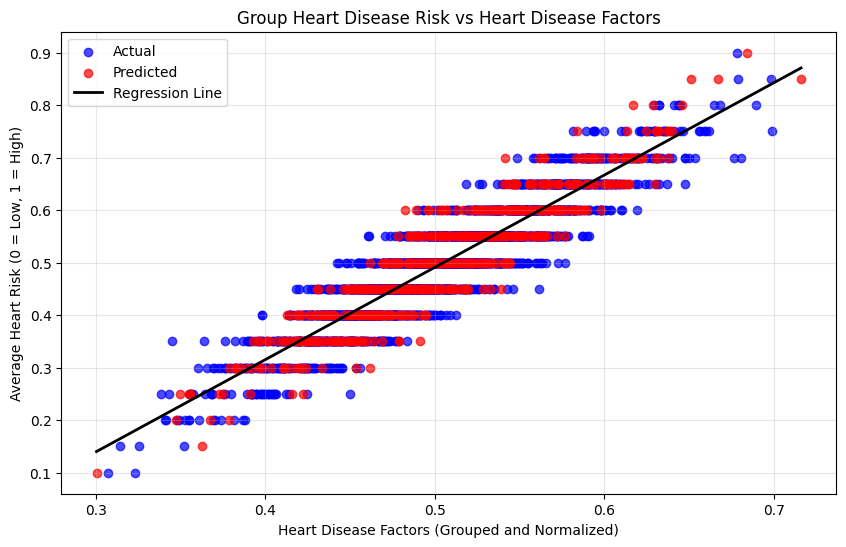

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.7, label='Actual')
plt.scatter(X_test, y_test, color='red', alpha=0.7, label='Predicted')

x_range = np.linspace(X['Heart_Disease_Factors'].min(), X['Heart_Disease_Factors'].max(), 100)
y_range = model.intercept_ + model.coef_[0] * x_range
plt.plot(x_range, y_range, color='black', linewidth=2,  label='Regression Line')
plt.title('Group Heart Disease Risk vs Heart Disease Factors')
plt.xlabel('Heart Disease Factors (Grouped and Normalized)')
plt.ylabel('Average Heart Risk (0 = Low, 1 = High)')
plt.legend()
plt.grid(True, alpha=0.3)


In [9]:

print("\nGrouped Data Summary Statistics:")
print(grouped_df[['Normalized_Symptoms', 'Normalized_Risk_Factors', 'Heart_Disease_Factors', risk[0]]].describe())


Grouped Data Summary Statistics:
       Normalized_Symptoms  Normalized_Risk_Factors  Heart_Disease_Factors  \
count          3500.000000              3500.000000            3500.000000   
mean              0.500177                 0.509409               0.504793   
std               0.073618                 0.051466               0.058009   
min               0.250000                 0.295950               0.300375   
25%               0.450000                 0.474437               0.465544   
50%               0.500000                 0.510150               0.503475   
75%               0.550000                 0.544663               0.544600   
max               0.768750                 0.680450               0.716075   

        Heart_Risk  
count  3500.000000  
mean      0.500000  
std       0.111326  
min       0.100000  
25%       0.450000  
50%       0.500000  
75%       0.550000  
max       0.900000  


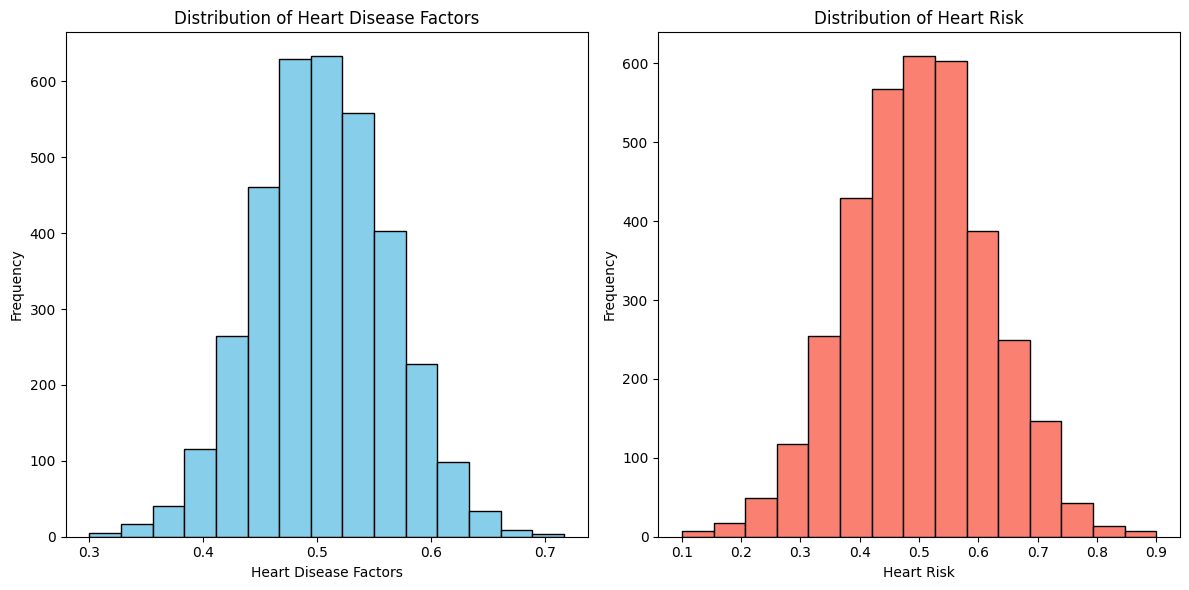

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(grouped_df['Heart_Disease_Factors'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Heart Disease Factors')
plt.xlabel('Heart Disease Factors')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(grouped_df[risk[0]], bins=15, color='salmon', edgecolor='black')
plt.title('Distribution of Heart Risk')
plt.xlabel('Heart Risk')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [11]:
correlations = df[symptoms + risk_factors].corrwith(df['Heart_Risk']).sort_values(ascending=False)
print("\nFactors most correlated with Heart Risk:")
print(correlations)


Factors most correlated with Heart Risk:
Age                    0.605182
Pain_Arms_Jaw_Back     0.601403
Cold_Sweats_Nausea     0.601093
Dizziness              0.600202
Chest_Pain             0.599944
Fatigue                0.599260
Swelling               0.599173
Shortness_of_Breath    0.598772
Palpitations           0.596773
High_Cholesterol       0.405001
Sedentary_Lifestyle    0.404696
High_BP                0.404462
Chronic_Stress         0.401914
Obesity                0.399229
Smoking                0.398007
Family_History         0.397604
Diabetes               0.396086
Gender                 0.293609
dtype: float64
